In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
import numpy as np
import CleaningCars as hf
from sklearn.model_selection import train_test_split

import statsmodels.api as sm

In [2]:
def load_data():    
    csv_path = os.path.join('data', 'vehicles.csv')
    return pd.read_csv(csv_path)

df = load_data()

In [3]:
df = hf.remove_columns(df)

In [4]:
df.isnull().sum()

region               0
price                0
year              1050
manufacturer     18220
model             4846
condition       192940
cylinders       171140
fuel              3237
odometer         55303
title_status      2577
transmission      2442
drive           134188
type            112738
paint_color     140843
description         70
state                0
lat               7448
long              7448
posting_date        28
dtype: int64

In [5]:
df = hf.imputeManufacturer(df)
df = hf.dateToDatetime(df)
df = hf.basicImpute(df)
df = hf.imputeMissingByManufacturer(df, col='fuel')
df = hf.imputeMissingByManufacturer(df, col='transmission')
df = hf.imputeOdometerByYear(df)


In [6]:
df.isnull().sum()

region               0
price                0
year              1050
manufacturer     11915
model             4846
condition       192940
cylinders       171140
fuel               296
odometer            28
title_status      2577
transmission       155
drive           134188
type            112738
paint_color     140843
description          0
state                0
lat               7448
long              7448
posting_date         0
dtype: int64

In [7]:
    df = df[df['year'].notna()]

In [8]:
df.isnull().sum()

region               0
price                0
year                 0
manufacturer     11106
model             4817
condition       191892
cylinders       171094
fuel               140
odometer             0
title_status      2298
transmission       127
drive           133998
type            112633
paint_color     140740
description          0
state                0
lat               7420
long              7420
posting_date         0
dtype: int64

In [11]:
df = hf.color_clean(df, color_list=['white','black','silver'])
df = hf.drive_clean(df)
df = hf.transmission_clean(df)
df = hf.titlestatus_clean(df)
df = hf.cleanLocationFeatures(df)
print("One hot encodings done!")

One hot encodings done!


In [14]:
df.columns

Index(['price', 'year', 'manufacturer', 'model', 'condition', 'cylinders',
       'fuel', 'odometer', 'type', 'description', 'lat', 'long',
       'posting_date', 'color_black', 'color_other', 'color_silver',
       'color_white', 'drive_4wd', 'drive_fwd', 'drive_other', 'drive_rwd',
       'transmission_automatic', 'transmission_manual', 'transmission_other',
       'status_clean', 'status_lien', 'status_missing', 'status_parts only',
       'status_rebuilt', 'status_salvage', 'state_ak', 'state_al', 'state_ar',
       'state_az', 'state_ca', 'state_co', 'state_ct', 'state_dc', 'state_de',
       'state_fl', 'state_ga', 'state_hi', 'state_ia', 'state_id', 'state_il',
       'state_in', 'state_ks', 'state_ky', 'state_la', 'state_ma', 'state_md',
       'state_me', 'state_mi', 'state_mn', 'state_mo', 'state_ms', 'state_mt',
       'state_nc', 'state_nd', 'state_ne', 'state_nh', 'state_nj', 'state_nm',
       'state_nv', 'state_ny', 'state_oh', 'state_ok', 'state_or', 'state_pa',
       

In [35]:
pd.get_dummies(df["cylinders"])

,10 cylinders,12 cylinders,3 cylinders,4 cylinders,5 cylinders,6 cylinders,8 cylinders,missing,other
0,0,0,0,0,0,0,1,0,0
1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0
3,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
458208,0,0,0,0,0,1,0,0,0
458209,0,0,0,1,0,0,0,0,0
458210,0,0,0,0,0,1,0,0,0
458211,0,0,0,0,0,0,1,0,0


In [36]:
df["cylinders"] = df["cylinders"].fillna("missing")

In [40]:
pd.get_dummies(df, columns = ["cylinders"]).drop(["cylinders_12 cylinders", "cylinders_10 cylinders", "cylinders_3 cylinders", "cylinders_5 cylinders", "cylinders_other"], axis = 1)

,price,year,manufacturer,model,condition,fuel,odometer,type,description,lat,...,state_va,state_vt,state_wa,state_wi,state_wv,state_wy,cylinders_4 cylinders,cylinders_6 cylinders,cylinders_8 cylinders,cylinders_missing
0,35990,2010.0,chevrolet,corvette grand sport,good,gas,32742.0,other,Carvana is the safer way to buy a car During t...,32.590000,...,0,0,0,0,0,0,0,0,1,0
1,7500,2014.0,hyundai,sonata,excellent,gas,93600.0,sedan,I'll move to another city and try to sell my c...,32.547500,...,0,0,0,0,0,0,1,0,0,0
2,4900,2006.0,bmw,x3 3.0i,good,gas,87046.0,SUV,Clean 2006 BMW X3 3.0I. Beautiful and rare Bl...,32.616807,...,0,0,0,0,0,0,0,1,0,0
3,2000,1974.0,chevrolet,c-10,good,gas,190000.0,pickup,1974 chev. truck (LONG BED) NEW starter front ...,32.861600,...,0,0,0,0,0,0,1,0,0,0
4,19500,2005.0,ford,f350 lariat,excellent,diesel,116000.0,pickup,2005 Ford F350 Lariat (Bullet Proofed). This t...,32.547500,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458208,14995,2014.0,cadillac,srx,excellent,gas,83790.0,SUV,2014 Cadillac SRX All Wheel Drive Luxury Colle...,44.408867,...,0,0,0,1,0,0,0,1,0,0
458209,17895,2018.0,hyundai,tucson,excellent,gas,31888.0,SUV,2018 Hyundai Tucson SE 2.0 I4 AWD. Carfax ver...,44.408867,...,0,0,0,1,0,0,1,0,0,0
458210,17900,2014.0,cadillac,cts coupe awd,excellent,gas,53000.0,coupe,"53,000 miles. Cosmetically, in near mint condi...",44.784900,...,0,0,0,0,0,1,0,1,0,0
458211,1300,2008.0,jeep,grand cherokee,good,gas,164000.0,SUV,PRICE REDUCTION Turns out the engine is toast...,44.773500,...,0,0,0,0,0,1,0,0,1,0


# CLEANING FUNCTION

In [3]:
df_processed = hf.ultimateClean(df)

Remove outliers...
Remove outliers...
Cleaned outliers !
Imputed Missing Values
One hot encodings done!
Total Time:  6.068484743436177  minutes


In [4]:
df_processed.head()

,price,year,condition,odometer,lat,long,color_black,color_other,color_silver,color_white,...,fuel_hybrid,fuel_other,tfidf_0,tfidf_2,tfidf_4,tfidf_5,tfidf_6,tfidf_7,tfidf_8,tfidf_9
0,35990,2010.0,1,32742.0,32.590000,-85.480000,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1,7500,2014.0,1,93600.0,32.547500,-85.468200,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,4900,2006.0,1,87046.0,32.616807,-85.464149,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
3,2000,1974.0,1,190000.0,32.861600,-85.216100,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
4,19500,2005.0,1,116000.0,32.547500,-85.468200,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [5]:
df_processed.columns

Index(['price', 'year', 'condition', 'odometer', 'lat', 'long', 'color_black',
       'color_other', 'color_silver', 'color_white', 'drive_4wd', 'drive_fwd',
       'drive_other', 'drive_rwd', 'transmission_automatic',
       'transmission_manual', 'transmission_other', 'status_clean',
       'status_lien', 'status_missing', 'status_parts only', 'status_rebuilt',
       'status_salvage', 'state_ak', 'state_al', 'state_ar', 'state_az',
       'state_ca', 'state_co', 'state_ct', 'state_dc', 'state_de', 'state_fl',
       'state_ga', 'state_hi', 'state_ia', 'state_id', 'state_il', 'state_in',
       'state_ks', 'state_ky', 'state_la', 'state_ma', 'state_md', 'state_me',
       'state_mi', 'state_mn', 'state_mo', 'state_ms', 'state_mt', 'state_nc',
       'state_nd', 'state_ne', 'state_nh', 'state_nj', 'state_nm', 'state_nv',
       'state_ny', 'state_oh', 'state_ok', 'state_or', 'state_pa', 'state_ri',
       'state_sc', 'state_sd', 'state_tn', 'state_tx', 'state_ut', 'state_va',
       '

In [7]:
list(df_processed.dtypes)

[dtype('int64'),
 dtype('float64'),
 dtype('int64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype

In [4]:
df_processed.shape

(311930, 86)

In [5]:
df_processed.columns

Index(['price', 'year', 'manufacturer', 'condition', 'odometer', 'type',
       'description', 'lat', 'long', 'color_black', 'color_other',
       'color_silver', 'color_white', 'drive_4wd', 'drive_fwd', 'drive_other',
       'drive_rwd', 'transmission_automatic', 'transmission_manual',
       'transmission_other', 'status_clean', 'status_lien', 'status_missing',
       'status_parts only', 'status_rebuilt', 'status_salvage', 'state_ak',
       'state_al', 'state_ar', 'state_az', 'state_ca', 'state_co', 'state_ct',
       'state_dc', 'state_de', 'state_fl', 'state_ga', 'state_hi', 'state_ia',
       'state_id', 'state_il', 'state_in', 'state_ks', 'state_ky', 'state_la',
       'state_ma', 'state_md', 'state_me', 'state_mi', 'state_mn', 'state_mo',
       'state_ms', 'state_mt', 'state_nc', 'state_nd', 'state_ne', 'state_nh',
       'state_nj', 'state_nm', 'state_nv', 'state_ny', 'state_oh', 'state_ok',
       'state_or', 'state_pa', 'state_ri', 'state_sc', 'state_sd', 'state_tn',
     

In [6]:
#list(df_processed.dtypes)

In [7]:
df_tfidf = hf.TF_IDF(df_processed, number = 1000)

In [8]:
df_tfidf.columns[-1000:]

Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
       ...
       990, 991, 992, 993, 994, 995, 996, 997, 998, 999],
      dtype='object', length=1000)

In [9]:
col = df_tfidf[df_tfidf.columns[-1000:]]
mean = col.mean(axis=1)

In [10]:
mean.shape, df_tfidf["price"].shape

((311930,), (311930,))

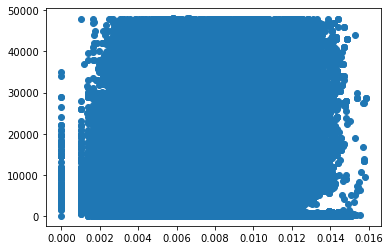

In [11]:
plt.scatter(mean.values, df_tfidf["price"].values)


In [12]:
df_tfidf.columns[-1001:-1]

Index(['fuel_other',            0,            1,            2,            3,
                  4,            5,            6,            7,            8,
       ...
                989,          990,          991,          992,          993,
                994,          995,          996,          997,          998],
      dtype='object', length=1000)

# Kmeans for TFIDF

In [14]:
from sklearn.cluster import KMeans
import numpy as np
X = df_tfidf[df_tfidf.columns[-1000:]].values
kmeans = KMeans(n_clusters = 10, random_state = 0).fit(X)

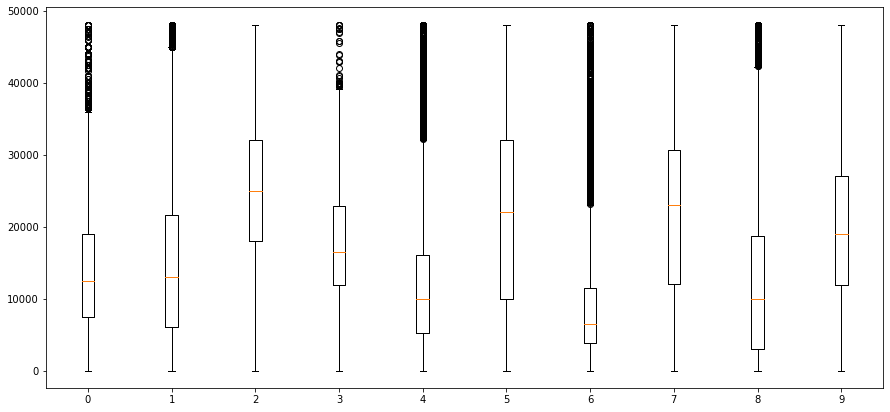

In [23]:
plt.figure(figsize = (15, 7))
for i in set(kmeans.labels_):
    index = np.where(kmeans.labels_ == i)
    plt.boxplot(df_tfidf["price"].values[index], positions = [i])


In [ ]:
import pickle
s = pickle.dumps(kmeans)
from joblib import dump, load
dump(kmeans, 'kmeans.joblib') 

In [53]:
clf = load('kmeans.joblib') 

In [55]:
X.shape

(311930, 1000)

In [57]:
df_tfidf["tfidf"] = clf.predict(X)

In [59]:
df_clustered = pd.get_dummies(df_tfidf, prefix="tfidf",columns=['tfidf'])

In [60]:
df_clustered.head()

,price,year,manufacturer,condition,odometer,type,description,lat,long,color_black,...,tfidf_0,tfidf_1,tfidf_2,tfidf_3,tfidf_4,tfidf_5,tfidf_6,tfidf_7,tfidf_8,tfidf_9
0,35990,2010.0,chevrolet,1,32742.0,other,Carvana is the safer way to buy a car During t...,32.590000,-85.480000,0,...,0,0,1,0,0,0,0,0,0,0
1,7500,2014.0,hyundai,1,93600.0,sedan,I'll move to another city and try to sell my c...,32.547500,-85.468200,0,...,0,0,0,0,0,0,1,0,0,0
2,4900,2006.0,bmw,1,87046.0,SUV,Clean 2006 BMW X3 3.0I. Beautiful and rare Bl...,32.616807,-85.464149,0,...,0,1,0,0,0,0,0,0,0,0
3,2000,1974.0,chevrolet,1,190000.0,pickup,1974 chev. truck (LONG BED) NEW starter front ...,32.861600,-85.216100,0,...,0,0,0,0,0,1,0,0,0,0
4,19500,2005.0,ford,1,116000.0,pickup,2005 Ford F350 Lariat (Bullet Proofed). This t...,32.547500,-85.468200,0,...,0,0,0,0,0,1,0,0,0,0


# Within Cluster Sum of Squared Error (WSS)

['kmeans.joblib']

In [35]:
df_tfidf[df_tfidf.columns[-1000:]].shape

(311930, 1000)

In [38]:
X_red = X[:10000]

In [39]:

kmeans = KMeans(n_clusters = 10, random_state = 0).fit(X_red)

In [46]:
from sklearn.cluster import KMeans

# function returns WSS score for k values from 1 to kmax
def calculate_WSS(points, kmax):
    sse = []
    for k in range(1, kmax+1):
        print("Number of Clusters: ", k)
        kmeans = KMeans(n_clusters = k).fit(points)
        centroids = kmeans.cluster_centers_
        pred_clusters = kmeans.predict(points)
        curr_sse = 0

        # calculate square of Euclidean distance of each point from its cluster center and add to current WSS
        for i in range(len(points)):
            curr_center = centroids[pred_clusters[i]]
            curr_sse += (points[i, 0] - curr_center[0]) ** 2 + (points[i, 1] - curr_center[1]) ** 2

        sse.append(curr_sse)
    return sse

In [49]:
sse = calculate_WSS(X_red, 20)

Number of Clusters:  1
Number of Clusters:  2
Number of Clusters:  3
Number of Clusters:  4
Number of Clusters:  5
Number of Clusters:  6
Number of Clusters:  7
Number of Clusters:  8
Number of Clusters:  9
Number of Clusters:  10
Number of Clusters:  11
Number of Clusters:  12
Number of Clusters:  13
Number of Clusters:  14
Number of Clusters:  15
Number of Clusters:  16
Number of Clusters:  17
Number of Clusters:  18
Number of Clusters:  19
Number of Clusters:  20


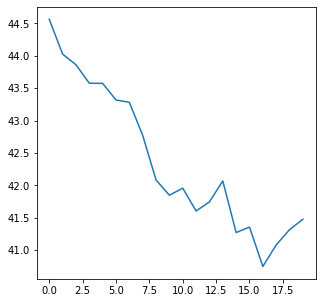

In [52]:
plt.figure(figsize = (5, 5))
plt.plot(sse)